<h2>Imports

In [1]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/address_data.csv')

In [3]:
X = df.drop(columns=['Address', 'FLAG'])
y = df['FLAG']
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(1000,1500,100),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [16]:
clf = XGBClassifier(
    objective= 'binary:logistic',
    seed=42
)

In [17]:
tuned_clf = GridSearchCV(estimator=clf,
                         param_grid=params,
                         scoring='f1',
                         cv=5,
                         verbose=2,
                         )

In [18]:
tuned_clf.fit(X_train_full,y_train_full)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   3.3s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   3.3s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   3.3s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   3.3s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1000; total time=   3.2s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   3.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   3.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   3.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   3.7s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1100; total time=   3.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_estimators=1200; total time=   4.6s
[CV] END ..learning_rate=0.1, max_depth=2, n_e

GridSearchCV(cv=5, estimator=XGBClassifier(seed=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(1000, 1500, 100)},
             scoring='f1', verbose=2)

In [21]:
tuned_clf.best_estimator_

XGBClassifier(learning_rate=0.05, max_depth=8, n_estimators=1000, seed=42)

In [22]:
tuned_clf.best_score_

0.9266381742653895

In [23]:
    y_pred = tuned_clf.predict(X_test)
    xgb_accuracy_score = accuracy_score(y_test, y_pred)
    xgb_auc_score = roc_auc_score(y_test, y_pred)
    print('XGBoost model accuracy score: {0:0.4f} '
      'and roc_auc score: {0:0.4f}'. format(xgb_accuracy_score,xgb_auc_score))

XGBoost model accuracy score: 0.9402 and roc_auc score: 0.9402


<h2>Loading of data

<h2>Model Training

In [ ]:
x_train_list = []
y_train_list = []
x_test_list = []
y_test_list = []

for i in range(10):
    y_train_new= train_list[i]['FLAG']
    y_test_new = test_list[i]['FLAG']

    x_train_new = train_list[i].drop(columns=['Address','FLAG'])
    x_test_new = test_list[i].drop(columns=['Address','FLAG'])

    x_train_list.append(x_train_new)
    y_train_list.append(y_train_new)
    x_test_list.append(x_test_new)
    y_test_list.append(y_test_new)

Used GridsearchCV for hyperparameter tuning and Manual cross validation

In [ ]:
accuracy_and_auc_score_list = []
for i in range(10):
    params = {
    'objective': ['binary:logistic'],
    'max_depth': [8],
    'learning_rate': [0.05],
    'n_estimators': [1000],
    }

    xgb_model = XGBClassifier()
    tuned_xgb = GridSearchCV(xgb_model,params,n_jobs=5,scoring='roc_auc',refit=True)
    tuned_xgb.fit(x_train_list[i],y_train_list[i])
    y_pred = tuned_xgb.predict(x_test_list[i])
    xgb_accuracy_score = accuracy_score(y_test_list[i], y_pred)
    xgb_auc_score = roc_auc_score(y_test_list[i], y_pred)
    item = [xgb_accuracy_score,xgb_auc_score]
    accuracy_and_auc_score_list.append(item)
    print('XGBoost model accuracy score: {0:0.4f} '
      'and roc_auc score: {0:0.4f}'. format(xgb_accuracy_score,xgb_auc_score))

XGBoost model accuracy score: 0.9581 and roc_auc score: 0.9581
XGBoost model accuracy score: 0.9581 and roc_auc score: 0.9581
XGBoost model accuracy score: 0.9517 and roc_auc score: 0.9517
XGBoost model accuracy score: 0.9555 and roc_auc score: 0.9555
XGBoost model accuracy score: 0.9530 and roc_auc score: 0.9530
XGBoost model accuracy score: 0.9536 and roc_auc score: 0.9536
XGBoost model accuracy score: 0.9441 and roc_auc score: 0.9441
XGBoost model accuracy score: 0.9460 and roc_auc score: 0.9460
XGBoost model accuracy score: 0.9562 and roc_auc score: 0.9562
XGBoost model accuracy score: 0.9581 and roc_auc score: 0.9581


<h2>Model Performance per K-Fold

In [ ]:
model_performance = pd.DataFrame(accuracy_and_auc_score_list)
model_performance.columns = ['Accuracy score', 'Roc_auc score']
model_performance

,Accuracy score,Roc_auc score
0,0.958095,0.958265
1,0.958069,0.958276
2,0.951715,0.951443
3,0.955527,0.955631
4,0.952986,0.952986
5,0.953621,0.953605
6,0.944091,0.944018
7,0.945997,0.945840
8,0.956163,0.956081
9,0.958069,0.958235


<h2>Overall Average Performance

In [ ]:
print('Mean Accuracy Score: {}'.format(model_performance['Accuracy score'].mean()))
print('Mean Roc_auc Score: {}'.format(model_performance['Roc_auc score'].mean()))

Mean Accuracy Score: 0.9534334119924971
Mean Roc_auc Score: 0.9534381921631996


<h2>Model Confusion Matrix and Statistics

Model Confusion Matrix Statistics:

 recall: 0.9517

 false_neg_rate: 0.0483

 false_pos_rate: 0.0352

 true_neg_rate: 0.9648

 positive_liklihood_ratio: 27.0346

 neg_liklihood_rate: 0.0501

 precision: 0.9660

 false_omission_rate: 0.0501

 false_discovery_rate: 0.0340

 neg_pred_value: 0.9499

 markedness: 0.9160

 diagnostic_odds_ration: 539.7151

 informedness: 0.9165

 prevalence_threshold: 0.1613

 prevalence: 0.5127

 accuracy: 0.9581

 balanced_accuracy: 0.9582

 F1_score: 0.9588

 fowlkes_mallows_index: 0.9588

 jaccard_index: 0.9209


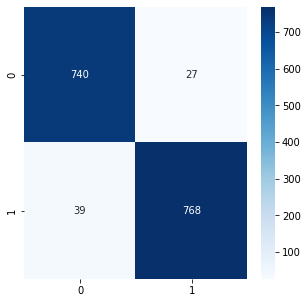

In [ ]:
def model_diagnostic_stats(confusion_matrix):
    tp = confusion_matrix[1,1]
    tn = confusion_matrix[0,0]
    fp = confusion_matrix[0,1]
    fn = confusion_matrix[1,0]

    p = tp + fn
    n = fp + tn
    pp = tp + fp
    pn = fn + tn

    diagnostic_dict = {
    'recall' : tp/p,
    'false_neg_rate' : fn/p,
    'false_pos_rate' : fp/n,
    'true_neg_rate' : tn/n,
    'positive_liklihood_ratio' : (tp/p)/(fp/n),
    'neg_liklihood_rate' : (fn/p)/(tn/n),
    'precision' : tp/pp,
    'false_omission_rate' : fn/pn,
    'false_discovery_rate' : fp/pp,
    'neg_pred_value' : tn/pn,
    'markedness' : (tp/pp)+(tn/pn)-1,
    'diagnostic_odds_ration' : ((tp/p)/(fp/n))/( (fn/p)/(tn/n)),
    'informedness' : (tp/p)+(tn/n)-1,
    'prevalence_threshold' : (sqrt((tp/p)*(fp/n))-(fp/n))/((tp/p)-(fp/n)),
    'prevalence' : p/(p+n),
    'accuracy' : (tp+tn)/(p+n),
    'balanced_accuracy' : ((tp/p)+(tn/n))/2,
    'F1_score' : 2*tp/(2*tp+fp+fn),
    'fowlkes_mallows_index' : sqrt((tp/pp)*(tp/p)),
    'jaccard_index' : tp/(tp+fn+fp),
    }

    return diagnostic_dict
cm_matrix = confusion_matrix(y_test_list[9],y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sb.heatmap(cm_matrix,annot=True,fmt='g',cmap="Blues")
stats = model_diagnostic_stats(cm_matrix)
print('Model Confusion Matrix Statistics:')
for key,value in stats.items():
    value_str = '%.4f' % value
    print("\n {}: {}".format(key,value_str))


<h2>Feature Importance Plot

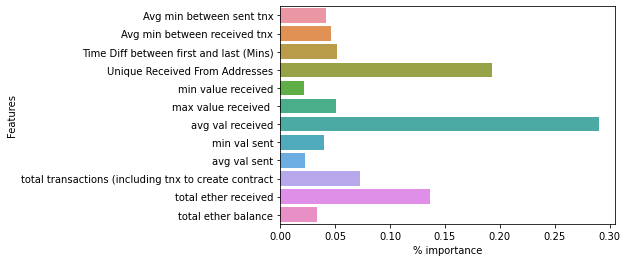

In [ ]:
feature_importances = tuned_xgb.best_estimator_.feature_importances_
column_var = x_train_list[0].columns.tolist()
feature_imprt_df = pd.DataFrame({'Features':column_var, '% importance': feature_importances})
formatted_vars_display = [ '%.3f' % elem for elem in feature_importances ]
ax = sb.barplot(x='% importance', y='Features',data=feature_imprt_df)
ax.set(xlabel='% importance', ylabel='Features')
plt.show()
